## <font face="Comic sans MS" color=#330000 >**Case Study**</font> 
## <font face="Comic sans MS" color=#330000 >**How Can a Wellness Technology Company Play It Smart**</font>

* ####  [About the Company](#section-one)
* ####  [Ask](#section-two)
* ####  [Prepare](#section-three)
    - [Data Information](#subsection-one)
    - [Data Prepare](#subsection-two)
    - [Findings](#subsection-three)
* ####  [Process](#section-four)
    - [Cleaning and formatting data](#subsection-four)
    - [Merging datasets](#subsection-five)
* ####  [Analyze](#section-five)
    - [Question#1](#subsection-six)
    - [Question#2](#subsection-seven)
    - [Question#3](#subsection-eight)
    - [Further Analyze](#subsection-nine)
    - [More interesting plots](#subsection-ten)
* ####  [Share](#section-six)


<a id="section-one"></a>
# **<font face="Comic sans MS" color=#330000 >About the Company</font>**
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women


<a id="section-two"></a>
# <font face="Comic sans MS" color=#330000 >**PHASE#1   ASK**</font>
The goal of this case study is to find out trends and patterns in smart device ussage of Bellabeat customers and use it to help in marketing the product and apps. The study would follow these guiding questions
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

<a id="section-three"></a>
# <font face="Comic sans MS" color=#330000 >**PHASE#2   PREPARE**</font>

The project would focus on the usage of the fitbit device and the daily metric records. This project will explore the data from 30 users regarding their daily activity health metrics recorded (steps, calories, heartrate, intensities, and sleep).
<a id="subsection-one"></a>
### <font face="Comic sans MS" color=#003300 >**2.1 Data Information**</font>
#### <font face="Playfair" >**2.1.1 Data Source**</font>
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius)
#### <font face="Playfair" >**2.1.2 Data Content**</font>
This Kaggle data set contains personal fitness tracker from 30 fitbit users who consented to sharing their minute-level output for physical activity, heart rate, and sleep monitoring.
 The contents of the dataset are 18 csv files which can be accessed from here - [Fitbits Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) 
 
<a id="subsection-two"></a>
### <font face="Comic sans MS" color=#003300 >**2.2 Data Prepare**</font>
As the data only covers two months and 30 users. This makes some files small enough to examine directly.We can quickly take a first look at these files using Excel or Google Spreadsheet.

We can find all files contain a primary key "Id" and some foreign keys. Since we only need to identify trends, we will simply load files conatining parameteres for daily and hourly basis, SleepDay and Weight 
#### <font face="Playfair" >**2.2.1 Install and load packages:**</font>



In [1]:
# installing packages
install.packages("tidyverse")
install.packages("dplyr")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("ggpubr")
install.packages("viridis")



# loading libraries
library(tidyverse)
library(dplyr)
library(lubridate)
library(skimr)
library(janitor)
library(viridis)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rlang’, ‘tibble’, ‘vctrs’


Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“d

#### <font face="Playfair" >**2.2.2 Exploring dataset**</font>
For this particular case study, we will be using the following data tables:
1. **dailyActivity_merged.csv**
1. **dailyCalories_merged.csv**
1. **dailyIntensities_merged.csv**
1. **dailySteps_merged.csv**
1. **hourlyCalories_merged.csv**
1. **hourlyIntensities_merged.csv**
1. **hourlySteps_merged.csv**
1. **sleepDay_merged.csv**
1. **weightLogInfo_merged.csv**
1. **heartrate_seconds_merged.csv**



In [2]:
#importing datasets
daily_Activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_Calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_Intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_Steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_Sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_Calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_Intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_Steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
weight_Info <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartrate_Seconds <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

**Let's take a overview of the datasets using head() and str()**

In [3]:
print('daily_activity overview')  
head(daily_Activity)
str(daily_Activity)
print('daily_calories overview')
head(daily_Calories)
str(daily_Calories)
print('daily_Intensities overview')
head(daily_Intensities)
str(daily_Intensities)
print('daily_Steps overview')
head(daily_Steps)
str(daily_Steps)
print('daily_Sleep overview')
head(daily_Sleep)
str(daily_Sleep)
print('hourly_Calories overview')
head(hourly_Calories)
str(hourly_Calories)
print('hourly_Intensities overview')
head(hourly_Intensities)
str(hourly_Intensities)
print('hourly_Steps overview')
head(hourly_Steps)
str(hourly_Steps)
print('weight_Info overview')
head(weight_Info)
str(weight_Info)
print('heartrate_Seconds overview')
head(heartrate_Seconds)
str(heartrate_Seconds)

[1] "daily_activity overview"


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
[1] "daily_Intensities overview"


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


'data.frame':	940 obs. of  10 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
[1] "daily_Steps overview"


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
[1] "daily_Sleep overview"


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...
[1] "hourly_Calories overview"


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...
[1] "hourly_Intensities overview"


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...
[1] "hourly_Steps overview"


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...
[1] "weight_Info overview"


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
[1] "heartrate_Seconds overview"


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


We have clearly see that the daily datasets of Activity , Calories, Intensities, and Steps might have overlaps, as they all contain 940 observations and similar column names.Similarly,the hourly datasets has overlaps. To confirm this, we will use the 'merge()' function to check for any overlap or duplication between the datasets.

In [4]:
merged_data_daily <- daily_Activity %>%
   inner_join(daily_Calories, by = c("Id","ActivityDate"="ActivityDay")) %>%
   inner_join(daily_Intensities, by = c("Id","ActivityDate"="ActivityDay")) %>%
   inner_join(daily_Steps, by = c("Id","ActivityDate"="ActivityDay"))
 
num_rows_daily <- nrow(merged_data_daily)
print(num_rows_daily)

[1] 940


Similarly we can create a new dataframe combining the data from hourly Calories , Intensities and Steps into a new data frame.

In [5]:
hourly_Activity <- hourly_Calories %>% 
    inner_join(hourly_Intensities, by = c("Id","ActivityHour")) %>% 
    inner_join(hourly_Steps, by = c("Id","ActivityHour"))
#overview of hourly_Activity
head(hourly_Activity)
str(hourly_Activity)
    

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
,<dbl>,<chr>,<int>,<int>,<dbl>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
2,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
3,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
4,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
5,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0
6,1503960366,4/12/2016 5:00:00 AM,48,0,0.000000,0


'data.frame':	22099 obs. of  6 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories        : int  81 61 59 47 48 48 48 47 68 141 ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...
 $ StepTotal       : int  373 160 151 0 0 0 0 0 250 1864 ...


##### **Let’s perform some checks**

#### *CHECK#1* 
How many distinct “Id” are in different datasets( in a previous statement by using str(), we  saw that Sleep, METs and Weight have different number of observations)

In [6]:
n_distinct(daily_Activity$Id) 
n_distinct(daily_Sleep$Id)
n_distinct(weight_Info$Id)
n_distinct(hourly_Activity$Id)
n_distinct(heartrate_Seconds$Id)

[1] 33

[1] 24

[1] 8

[1] 33

[1] 14

This means that we have activity data for 33 individuals while data containing weight
_info, Sleep and Heartrate_seconds have only 24, 8 and 14 distinct id numbers respectively.

#### *CHECK#2*  
Do we have duplicate data by using duplicate()

In [7]:
sum(duplicated(daily_Activity))
sum(duplicated(daily_Sleep))
sum(duplicated(weight_Info))
sum(duplicated(hourly_Activity))
sum(duplicated(heartrate_Seconds))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

#### *CHECK#3* 
Do we have NAs in the dataset by using is.na()?

In [8]:
sum(is.na(daily_Activity))
sum(is.na(daily_Sleep))
sum(is.na(weight_Info))
sum(is.na(hourly_Activity))
sum(is.na(heartrate_Seconds))

[1] 0

[1] 0

[1] 65

[1] 0

[1] 0

#### *CHECK#4*
Also, we should examine whether the duration is from 03.12.2016 to 05.12.2016, as mentioned in the data source.

In [9]:
daily_Activity %>%
   select(ActivityDate) %>%
   distinct()


ActivityDate
<chr>
4/12/2016
4/13/2016
4/14/2016
4/15/2016
4/16/2016
4/17/2016
4/18/2016
4/19/2016
4/20/2016


In [10]:
daily_Sleep %>% 
   distinct(SleepDay) %>% 
   arrange(as.Date(SleepDay, "%m/%d/%Y"))

SleepDay
<chr>
4/12/2016 12:00:00 AM
4/13/2016 12:00:00 AM
4/14/2016 12:00:00 AM
4/15/2016 12:00:00 AM
4/16/2016 12:00:00 AM
4/17/2016 12:00:00 AM
4/18/2016 12:00:00 AM
4/19/2016 12:00:00 AM
4/20/2016 12:00:00 AM


Looks like the dataset covers only 1 month period from 04.12.2016 to 05.12.2016.

<a id="subsection-three"></a>
### <font face="Comic sans MS" color=#003300 >**2.2.3 Findings**</font>

From the dataset preview(explore), we can identify some limitations based on ROCCC:

* **Reliable**: According to NIH, 21% of people are using wearable fitness tracker in USA, so we will need at least 385 samples to reach 95% confidence level at a margin of error 5% (considering 332 million of population in USA), however the dataset only contains data from 33 users, this could result in biased and insignificant findings, so we would consider this dataset as not reliable.
* **Original**: This dataset is not original as it was generated by a survey through Amazon Mechanical Turk
* **Comprehensive**: Gender and age information is not available. However, since Bellabeat focuses on women's health products, ideally we should focus on women. Furthermore, we will omit weight data as there are only 8 users' data and less sample points, as compared to the other datasets.
* **Current**: The data is from 2016 and only covers 1 month from 4/12/2016-5/12/2016 (not same as mentioned from Fitbit source). Life circumstances may have changed significantly since then.
* **Cited**: The dataset is cited from FitBit Fitness Tracker Data
* **Others**: Date & column name need to be formatted and duplicated and subsets need to be removed.

<a id="section-four"></a>
# <font face="Comic sans MS" color=#330000 >**PHASE#3   PROCESS**</font>
In this phase, we will further process cleaning based on the findings in the prepare phase.



<a id="subsection-four"></a>
### <font face="Comic sans MS" color=#003300 >**3.1 Cleaning and formatting data**</font>

In [11]:
#remove subsets
rm(daily_Calories)
rm(daily_Intensities)
rm(daily_Steps)
rm(hourly_Calories)
rm(hourly_Intensities)
rm(hourly_Steps)


In [12]:
#remove duplicates in daily_Sleep dataset
daily_Sleep <- daily_Sleep %>% 
   distinct()
sum(duplicated(daily_Sleep))

[1] 0

In [13]:
#format column names
daily_Activity <- rename_with(daily_Activity, tolower)
daily_Sleep <- rename_with(daily_Sleep, tolower)
hourly_Activity <- rename_with(hourly_Activity,tolower)
heartrate_Seconds <- rename_with(heartrate_Seconds,tolower)
colnames(daily_Activity)
colnames(daily_Sleep)
colnames(hourly_Activity)
colnames(heartrate_Seconds)

[1] "id"                       "activitydate"            
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"

[1] "id"                 "sleepday"           "totalsleeprecords" 
[4] "totalminutesasleep" "totaltimeinbed"

[1] "id"               "activityhour"     "calories"         "totalintensity"  
[5] "averageintensity" "steptotal"

[1] "id"    "time"  "value"

In [14]:
#format activitydate column in daily_Activity dataset
daily_Activity <- daily_Activity %>% 
   rename(date=activitydate) %>%  
   mutate(date=as.Date(date,"%m/%d/%Y")) #the original date format is mm/dd/yyyy
str(daily_Activity)
head(daily_Activity)

'data.frame':	940 obs. of  15 variables:
 $ id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                    : Date, format: "2016-04-12" "2016-04-13" ...
 $ totalsteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ totaldistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ trackerdistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ loggedactivitiesdistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactivedistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderatelyactivedistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ lightactivedistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentaryactivedistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactiveminutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairlyactiveminutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightlyactiveminutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentaryminutes        : int  728 776 1218 726 773 539 1149 775 818 

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [15]:
#format activityhour column in hourly_Activity dataset
hourly_Activity <- extract(hourly_Activity, activityhour, into = c("date", "time"), "^(\\S+)\\s+(.*)") #converting activity_hour into 2 seperate columns 
hourly_Activity$date <- mdy(hourly_Activity$date) #coverting class of date from 'chr' to 'date' 
hourly_Activity$time <- strptime(hourly_Activity$time, "%I:%M:%S %p") #converting the type of 'time' from 12hr to 24hr format 
hourly_Activity$time <- format(hourly_Activity$time, "%H:%M:%S") 
hourly_Activity$hour <- substr(hourly_Activity$time,start=1,stop=2) #making a new column for hour of the day
head(hourly_Activity)
str(hourly_Activity)

,id,date,time,calories,totalintensity,averageintensity,steptotal,hour
,<dbl>,<date>,<chr>,<int>,<int>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,00:00:00,81,20,0.333333,373,00
2,1503960366,2016-04-12,01:00:00,61,8,0.133333,160,01
3,1503960366,2016-04-12,02:00:00,59,7,0.116667,151,02
4,1503960366,2016-04-12,03:00:00,47,0,0.000000,0,03
5,1503960366,2016-04-12,04:00:00,48,0,0.000000,0,04
6,1503960366,2016-04-12,05:00:00,48,0,0.000000,0,05


'data.frame':	22099 obs. of  8 variables:
 $ id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date            : Date, format: "2016-04-12" "2016-04-12" ...
 $ time            : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...
 $ calories        : int  81 61 59 47 48 48 48 47 68 141 ...
 $ totalintensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ averageintensity: num  0.333 0.133 0.117 0 0 ...
 $ steptotal       : int  373 160 151 0 0 0 0 0 250 1864 ...
 $ hour            : chr  "00" "01" "02" "03" ...


In [16]:
#format sleepday column in dailysleep dataset
daily_Sleep <- daily_Sleep %>%
   rename(date = sleepday) %>%
   mutate(date = as.Date(date, format="%m/%d/%Y %I:%M:%S %p")) 
#the original format is mm/dd/yyyy hr:mins:secs AM/PM format, MUST put capital Y instead of y
head(daily_Sleep)
str(daily_Sleep)

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


'data.frame':	410 obs. of  5 variables:
 $ id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date              : Date, format: "2016-04-12" "2016-04-13" ...
 $ totalsleeprecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ totalminutesasleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ totaltimeinbed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [17]:
#format time column in heartrate_Seconds dataset
heartrate_Seconds <- extract(heartrate_Seconds,time, into = c("date", "time"), "^(\\S+)\\s+(.*)") #converting time into 2 seperate columns 
heartrate_Seconds$date <- mdy(heartrate_Seconds$date) #coverting class of date from 'chr' to 'date' 
heartrate_Seconds$time <- strptime(heartrate_Seconds$time, "%I:%M:%S %p") #converting the type of 'time' from 12hr to 24hr format 
heartrate_Seconds$time <- format(heartrate_Seconds$time, "%H:%M:%S") 
heartrate_Seconds$hour <- substr(heartrate_Seconds$time,start=1,stop=2)
head(heartrate_Seconds)
str(heartrate_Seconds)

,id,date,time,value,hour
,<dbl>,<date>,<chr>,<int>,<chr>
1,2022484408,2016-04-12,07:21:00,97,07
2,2022484408,2016-04-12,07:21:05,102,07
3,2022484408,2016-04-12,07:21:10,105,07
4,2022484408,2016-04-12,07:21:20,103,07
5,2022484408,2016-04-12,07:21:25,101,07
6,2022484408,2016-04-12,07:22:05,95,07


'data.frame':	2483658 obs. of  5 variables:
 $ id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ date : Date, format: "2016-04-12" "2016-04-12" ...
 $ time : chr  "07:21:00" "07:21:05" "07:21:10" "07:21:20" ...
 $ value: int  97 102 105 103 101 95 91 93 94 93 ...
 $ hour : chr  "07" "07" "07" "07" ...


<a id="subsection-five"></a>
### <font face="Comic sans MS" color=#003300 >**3.2 Merging datasets**</font>
Let’s merge daily_activity and daily_sleep by “id” and “date”

In [18]:
daily_Activity_Sleep <- daily_Activity %>% inner_join( daily_Sleep, 
        by=c('id'='id', 'date'='date'))

colnames(daily_Activity_Sleep)

[1] "id"                       "date"                    
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"                 "totalsleeprecords"       
[17] "totalminutesasleep"       "totaltimeinbed"

<a id="section-five"></a>
# <font face="Comic sans MS" color=#330000 >**PHASE#4   ANALYZE**</font>
Since our business task is to “Identify trends in how consumers use smart devices to help develop marketing strategies for the Bellabeat app.” In order to improve Bellabeat app using experience and to increase user engagement, I will analyze the data in this phase by answering the following questions:
* How frequently did Fitbit users use their devices?

➡️ This information can be used by Bellabeat to encourage users to log in to their devices more frequently in order to maintain a healthier lifestyle
* What was the average number of steps taken by Fitbit users, and what was the risk of all-cause mortality % among the fitbit user. 

➡️ This data can be used by Bellabeat to set goals and help users understand the benefits of walking more.
* What did the sleep quality of Fitbit users look like, and is there a correlation between more sleep and being more active?

➡️  Understanding sleep patterns can help Bellabeat users gain more energy for the day and improve their overall health.

<a id="subsection-six"></a>
### <font face="Comic sans MS" color=#003300 >**4.1 Question#1:**</font>

How frequently did Fitbit users use their devices?

In prepare phase, we discovered that the datasource include only one-month period . This discovery enabled us to classify users into three types:

1. **Active_usage:** user who logged in between 21-31 days.
1. **Moderate_usage:** user who logged in between 11-20 days.
1. **Low_usage:** user who logged in between 1-10 days.

Let’s create a new dataset grouping user’s id and addding a new column that reflects their respective type based on the classification we did above

In [19]:
daily_Usage <- daily_Activity_Sleep %>%
   group_by(id) %>%
   summarize(day_used =sum(n())) %>%  #the n() function is used within summarize to count the number of rows in each group of id, if there are multiple rows, it will count all of them
   mutate(usage =case_when(
     day_used >=21 & day_used <=31 ~"active_usage",
     day_used >=11 & day_used <=21 ~"moderate_usage",
     day_used >=1 & day_used <=10 ~"low_usage",
     TRUE ~ "unknown_usage"
   ))
head(daily_Usage)

id,day_used,usage
<dbl>,<int>,<chr>
1503960366,25,active_usage
1644430081,4,low_usage
1844505072,3,low_usage
1927972279,5,low_usage
2026352035,28,active_usage
2320127002,1,low_usage


We have group of usage now, let’s check the percentage of each group

In [20]:
usage_Count <- daily_Usage %>% 
  group_by(usage) %>% 
  summarize(count=n()) %>% 
  mutate(ttl_percent = paste0(round(count/sum(count)*100),"%"))
head(usage_Count)

usage,count,ttl_percent
<chr>,<int>,<chr>
active_usage,12,50%
low_usage,9,38%
moderate_usage,3,12%


Warning message in geom_col(mapping = aes(x = "", y = ttl_percent, fill = usage), :
“Ignoring unknown parameters: `stat`”
Saving 12.5 x 6.67 in image


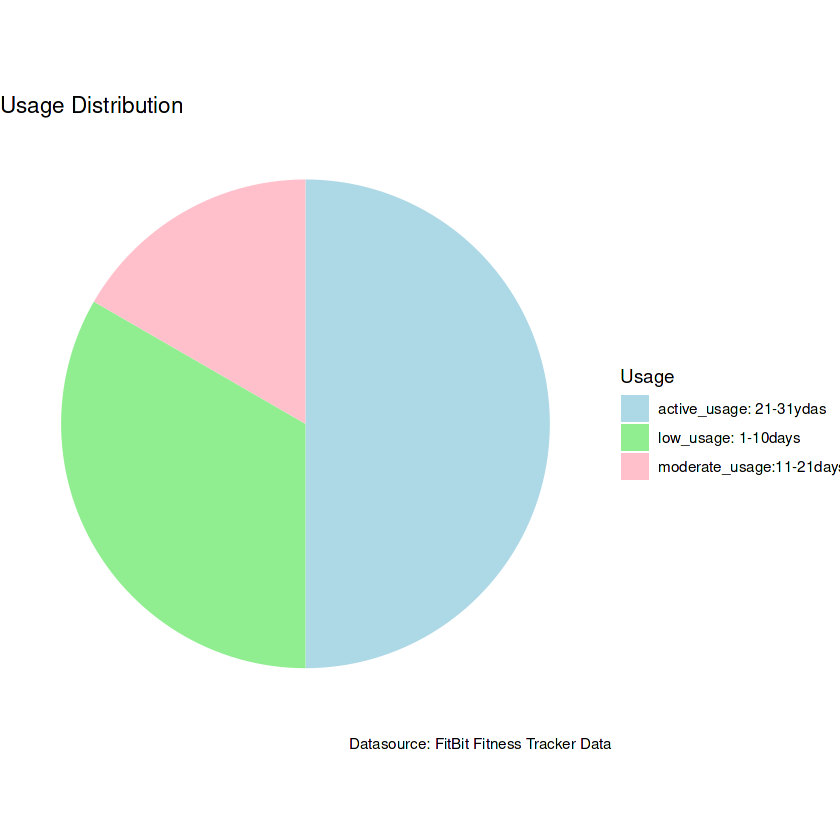

In [21]:
#plotting an aesthetic bar chart for usage distribution 
#since ggplot2 doesn't have a seperate plot function for bar charts
#we can plot bar chart using column chart
ggplot(data = usage_Count) +
  geom_col(mapping = aes(x="",y=ttl_percent, fill=usage), stat = "identity") +
  coord_polar("y",start = 0)+
  scale_fill_manual(values = c("lightblue","lightgreen","pink"),
                    labels= c("active_usage: 21-31ydas ","low_usage: 1-10days","moderate_usage:11-21days")) +
  labs(title="Usage Distribution", fill="Usage",caption = "Datasource: FitBit Fitness Tracker Data") +
  theme_void()
ggsave("Usage Distribution.png")

<a id="subsection-seven"></a>
### <font face="Comic sans MS" color=#003300 >**4.2 Question#2:**</font>

What was the average number of steps taken by Fitbit users, and what was the risk of all-cause mortality % among the fitbit user. Additionally, is there a correlation between taking more steps and burning more calories?

We will base our analysis on the CDC news article which was released on March of 2020.

According to it, "Compared with taking 4,000 steps per day, a number considered to be low for adults, taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. In contrast, the authors saw no association between step intensity and risk of death after accounting for the total number of steps taken per day.”

So we will divide our dataset id's into-

* lowest_risk: people who take more than 12000 steps a day
* moderate_to_low_risk: people who take 8000-12000 steps a day
* moderate_risk: people who take 4000-8000 steps a day
* high_risk: people who take less than 4000 steps a day.

In [22]:
avg_Daily_Steps <- daily_Activity_Sleep %>% 
  group_by(id) %>% 
  summarize(mean_steps = mean(totalsteps)) %>% 
  mutate(risk_count = case_when(
    mean_steps >=12000 ~"lowest_risk",
    mean_steps <= 12000& mean_steps >= 8000 ~"moderate_to_low_risk",
    mean_steps <= 8000& mean_steps >=4000 ~"moderate_risk",
    mean_steps < 4000 ~"high_risk",
    TRUE ~"unknow_risk"
  ))
head(avg_Daily_Steps)

id,mean_steps,risk_count
<dbl>,<dbl>,<chr>
1503960366,12405.680,lowest_risk
1644430081,7967.750,moderate_risk
1844505072,3477.000,high_risk
1927972279,1490.000,high_risk
2026352035,5618.679,moderate_risk
2320127002,5079.000,moderate_risk


In [23]:
steps_Count <-avg_Daily_Steps %>% 
  group_by(risk_count) %>% 
  summarize(count=n()) %>% 
  mutate(ttl_risk_percent =paste0(round(count/sum(count)*100),"%")) %>% 
  arrange(count)
head(steps_Count)

risk_count,count,ttl_risk_percent
<chr>,<int>,<chr>
lowest_risk,2,8%
high_risk,4,17%
moderate_risk,7,29%
moderate_to_low_risk,11,46%


In [24]:
avg_Daily_Steps_Count <- merge(avg_Daily_Steps,steps_Count, by=c("risk_count"))
head(avg_Daily_Steps_Count)


,risk_count,id,mean_steps,count,ttl_risk_percent
,<chr>,<dbl>,<dbl>,<int>,<chr>
1,high_risk,1844505072,3477.000,4,17%
2,high_risk,1927972279,1490.000,4,17%
3,high_risk,8792009665,3443.267,4,17%
4,high_risk,6775888955,3499.000,4,17%
5,lowest_risk,1503960366,12405.680,2,8%
6,lowest_risk,8053475328,19078.667,2,8%


Saving 12.5 x 6.67 in image


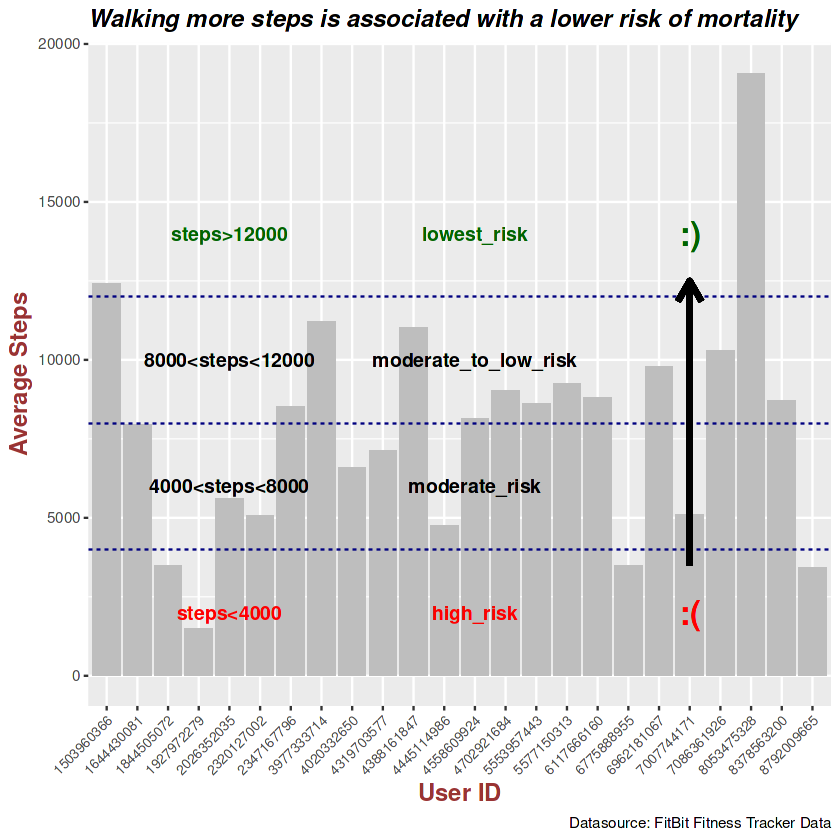

In [25]:
#creating a bar chart
ideal_steps <- c(4000,8000,12000)
ggplot(data = avg_Daily_Steps_Count, aes(x = factor(id), y = mean_steps)) +
  geom_bar(stat = "identity", fill = "grey") +
  geom_hline(yintercept = ideal_steps, color = "navy",linetype ="dashed") +
  ggtitle("Walking more steps is associated with a lower risk of mortality")+
  theme(axis.title.x = element_text(color="#993333", size=14, face="bold"),
  axis.title.y = element_text(color="#993333", size=14, face="bold"),plot.title = element_text(color="black", size=14, face="bold.italic"),axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8)) +
  labs(x = "User ID", y = "Average Steps", caption = "Datasource: FitBit Fitness Tracker Data")+
  annotate("text", x = 5, y = 2000, label = "steps<4000", color = "red", size = 4, fontface="bold") +
  annotate("text", x = 5, y = 6000, label = "4000<steps<8000", color = "black", size = 4, fontface="bold") +
  annotate("text", x = 5, y = 10000, label = "8000<steps<12000", color = "black", size = 4, fontface="bold") +
  annotate("text", x = 5, y = 14000, label = "steps>12000", color = "darkgreen", size = 4, fontface="bold")+
  annotate("text", x = 13, y = 2000, label = "high_risk", color = "red", size = 4, fontface="bold") +
  annotate("text", x = 13, y = 6000, label = "moderate_risk", color = "black", size = 4, fontface="bold") +
  annotate("text", x = 13, y = 10000, label = "moderate_to_low_risk", color = "black", size = 4, fontface="bold") +
  annotate("text", x = 13, y = 14000, label = "lowest_risk", color = "darkgreen", size = 4, fontface="bold") +
  annotate("text", x = 20, y = 2000, label = ":(",  size = 7, color = "red",fontface="bold")+
  annotate("text", x = 20, y = 14000, label = ":)",  size = 7,color = "darkgreen", fontface="bold")+
  geom_segment(aes(x=20, y=3500, xend=20, yend=12500), arrow = arrow(length=unit(.5, 'cm')),
               color='black', lwd=1.3)
ggsave("steps vs mortality.png")

<a id="subsection-eight"></a>
### <font face="Comic sans MS" color=#003300 >**4.3 Question#3:**</font>

What did the sleep quality of Fitbit users look like, and is there a correlation between more sleep and being more active?

As we don't have age data from the Fitbit health tracker, we can take 7 hours as the minimum recommended sleep hour.


In [26]:
daily_Sleep_Avg <- daily_Activity_Sleep %>% 
  group_by(id) %>% 
  summarize(mean_sleep = round(mean(totalminutesasleep/60),2))

head(daily_Sleep_Avg)
str(daily_Sleep_Avg)

id,mean_sleep
<dbl>,<dbl>
1503960366,6.00
1644430081,4.90
1844505072,10.87
1927972279,6.95
2026352035,8.44
2320127002,1.02


tibble [24 × 2] (S3: tbl_df/tbl/data.frame)
 $ id        : num [1:24] 1.50e+09 1.64e+09 1.84e+09 1.93e+09 2.03e+09 ...
 $ mean_sleep: num [1:24] 6 4.9 10.87 6.95 8.44 ...


Saving 12.5 x 6.67 in image


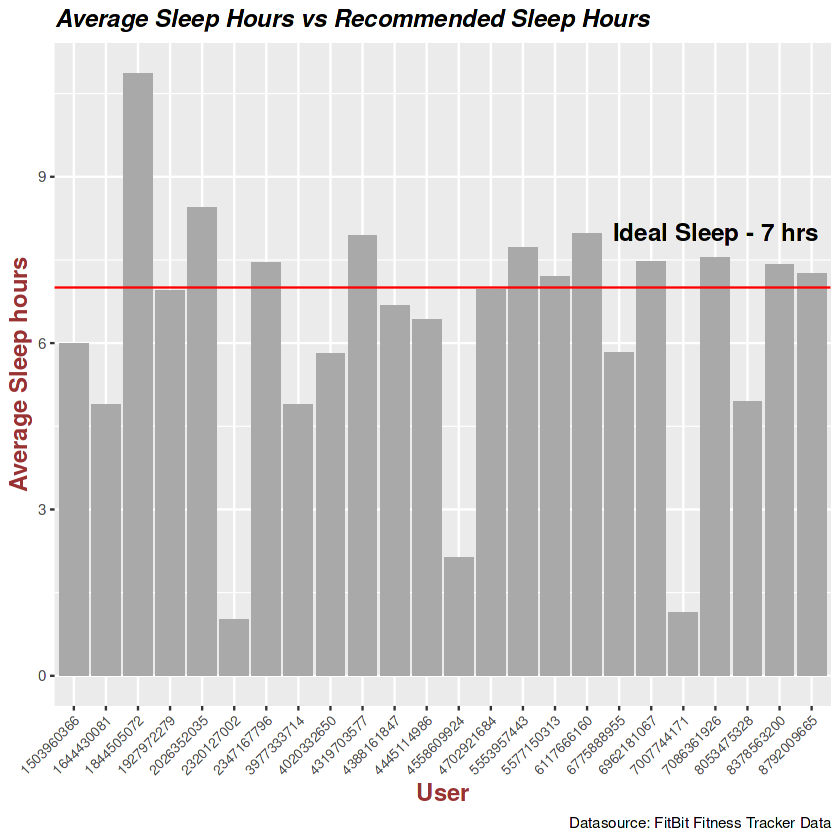

In [27]:
#creating a bar chart
ggplot(data=daily_Sleep_Avg, aes(x = factor(id), y = mean_sleep)) +
  geom_bar(stat = "identity", fill = "darkgray") +
  geom_hline(yintercept = 7, color = "red")+
  theme(plot.title = element_text(color="black", size=14, face="bold.italic"),axis.title.x = element_text(color="#993333", size=14, face="bold"),
  axis.title.y = element_text(color="#993333", size=14, face="bold"),axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1, size = 8)) +
  labs(x = "User", y = "Average Sleep hours", title="Average Sleep Hours vs Recommended Sleep Hours", caption = "Datasource: FitBit Fitness Tracker Data") +
  annotate("text", x = 21, y= 8, label="Ideal Sleep - 7 hrs", color="black",fontface="bold",size=5)
ggsave("Avg sleep hour vs Rec. sleep hour.png")

As a result,we can see that half of the users did not cross the recommended 7 hours of sleep.

How about the correlation between sleep time and steps?

`geom_smooth()` using formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


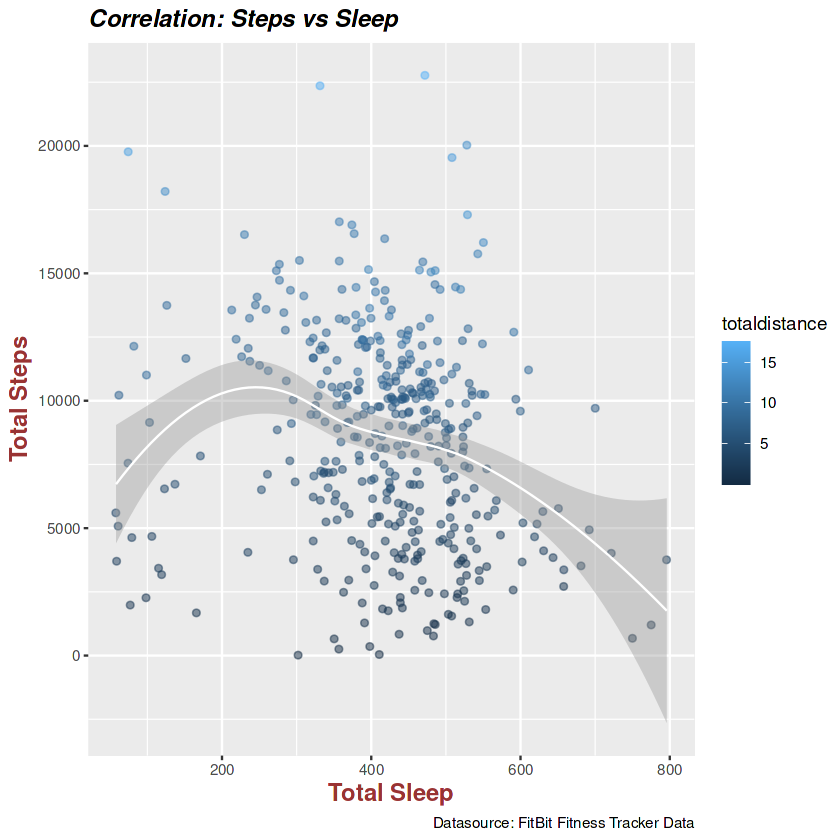

In [28]:
ggplot(daily_Activity_Sleep, aes(x = totalminutesasleep, y = totalsteps, color = totaldistance)) +
  geom_jitter(alpha = 0.5) +
  geom_smooth(method = loess,color="white", linewidth=0.5) +
  labs(x = "Total Sleep", y = "Total Steps",title = "Correlation: Steps vs Sleep",caption = "Datasource: FitBit Fitness Tracker Data")+
  theme(plot.title = element_text(color="black", size=14, face="bold.italic"),axis.title.x = element_text(color="#993333", size=14, face="bold"),
  axis.title.y = element_text(color="#993333", size=14, face="bold"))
ggsave("Correlation: Steps vs Sleep.png")

As we can see, there is no correlation between steps and sleep.

In [29]:
#converting datset value from seconds into hour
heartrate_Hourly <- heartrate_Seconds %>%
    group_by(id,date,hour) %>%
    summarize(hourly_value=mean(value))
head(heartrate_Hourly)

`summarise()` has grouped output by 'id', 'date'. You can override using the
`.groups` argument.


id,date,hour,hourly_value
<dbl>,<date>,<chr>,<dbl>
2022484408,2016-04-12,07,83.20000
2022484408,2016-04-12,08,68.56201
2022484408,2016-04-12,09,66.40470
2022484408,2016-04-12,10,106.71608
2022484408,2016-04-12,11,67.76716
2022484408,2016-04-12,12,66.23057


<a id="subsection-nine"></a>
### <font face="Comic sans MS" color=#003300 >**4.4 Further Analyze:**</font>

In [30]:
#merging hourly_Activity and heartrate_Seconds datasets 
hourly_Activity_Heartrate <- hourly_Activity %>%
    inner_join(heartrate_Hourly , by=c('id'='id', 'date'='date','hour'='hour'))

head(hourly_Activity_Heartrate)
str(hourly_Activity_Heartrate)

,id,date,time,calories,totalintensity,averageintensity,steptotal,hour,hourly_value
,<dbl>,<date>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>
1,2022484408,2016-04-12,07:00:00,136,28,0.466667,847,07,83.20000
2,2022484408,2016-04-12,08:00:00,99,13,0.216667,334,08,68.56201
3,2022484408,2016-04-12,09:00:00,90,13,0.216667,243,09,66.40470
4,2022484408,2016-04-12,10:00:00,369,143,2.383333,5243,10,106.71608
5,2022484408,2016-04-12,11:00:00,99,20,0.333333,323,11,67.76716
6,2022484408,2016-04-12,12:00:00,86,11,0.183333,184,12,66.23057


'data.frame':	6006 obs. of  9 variables:
 $ id              : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ date            : Date, format: "2016-04-12" "2016-04-12" ...
 $ time            : chr  "07:00:00" "08:00:00" "09:00:00" "10:00:00" ...
 $ calories        : int  136 99 90 369 99 86 124 197 91 112 ...
 $ totalintensity  : int  28 13 13 143 20 11 19 54 9 19 ...
 $ averageintensity: num  0.467 0.217 0.217 2.383 0.333 ...
 $ steptotal       : int  847 334 243 5243 323 184 658 2168 327 539 ...
 $ hour            : chr  "07" "08" "09" "10" ...
 $ hourly_value    : num  83.2 68.6 66.4 106.7 67.8 ...


In [31]:
avg_Hourly_Calories <- hourly_Activity %>%
    group_by(hour) %>%
    summarize(hourly_calories=mean(calories))
head(avg_Hourly_Calories)
str(avg_Hourly_Calories)

hour,hourly_calories
<chr>,<dbl>
00,71.80514
01,70.16506
02,69.18650
03,67.53805
04,68.26180
05,81.70815


tibble [24 × 2] (S3: tbl_df/tbl/data.frame)
 $ hour           : chr [1:24] "00" "01" "02" "03" ...
 $ hourly_calories: num [1:24] 71.8 70.2 69.2 67.5 68.3 ...


<a id="subsection-ten"></a>
### <font face="Comic sans MS" color=#003300 >**4.5 More interesting plots**</font>

Saving 12.5 x 6.67 in image


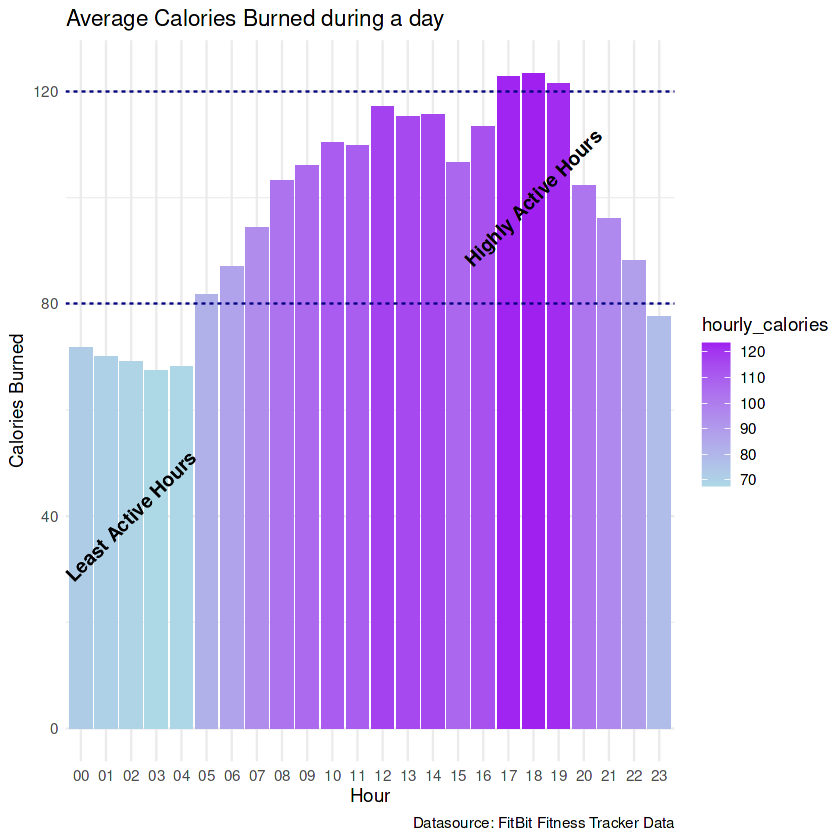

In [32]:
#making a bar chart
calories_bifurcation <- c(80,120)
ggplot(data=avg_Hourly_Calories, aes(x = factor(hour), y = hourly_calories,fill =hourly_calories )) +
  geom_bar(stat="identity") +
  geom_hline(yintercept = calories_bifurcation, color = "navy",linetype ="dashed") +
  labs(x = "Hour", y = "Calories Burned", title="Average Calories Burned during a day ", caption = "Datasource: FitBit Fitness Tracker Data") +
  annotate("text", x = 3, y = 40, label = "Least Active Hours",  size = 4,color = "black", fontface="bold",angle="45")+
  annotate("text", x = 19, y = 100, label = "Highly Active Hours",  size = 4,color = "black", fontface="bold",angle="45")+
  theme(axis.title.x = element_text(color="#993333", size=14, face="bold"), axis.title.y = element_text(color="#993333", size=14, face="bold"),plot.title = element_text(color="black", size=14, face="bold.italic"))+
  scale_fill_gradient(high = "purple", low = "lightblue") +
  theme_minimal()

ggsave("Calories burned each hour.png")


`geom_smooth()` using formula = 'y ~ x'


geom_smooth: na.rm = FALSE, orientation = NA, se = TRUE
stat_smooth: na.rm = FALSE, orientation = NA, se = TRUE
position_identity 

Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


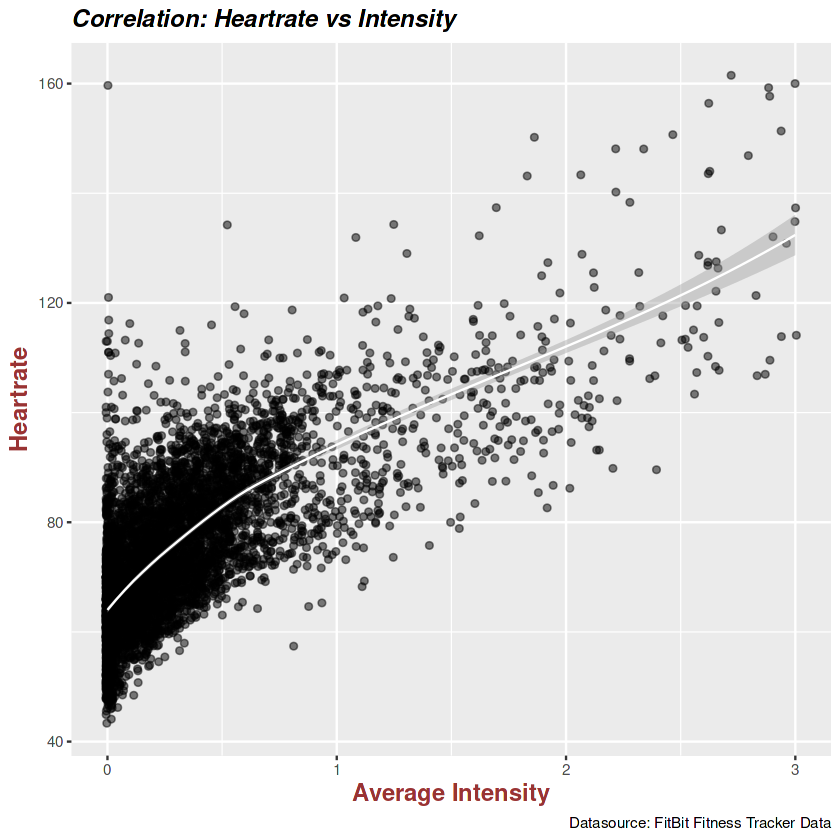

In [33]:
#making a scatterplot
ggplot(hourly_Activity_Heartrate, aes(x = averageintensity, y = hourly_value)) +
    geom_jitter(alpha = 0.5) +
    geom_smooth(method = loess,color="white", linewidth=0.5) +
    labs(x = "Average Intensity", y = "Heartrate",title = "Correlation: Heartrate vs Intensity",caption = "Datasource: FitBit Fitness Tracker Data")+
    theme(plot.title = element_text(color="black", size=14, face="bold.italic"),axis.title.x = element_text(color="#993333", size=14, face="bold"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))
    geom_smooth()
ggsave("Heartrate vs Intensity.png")

We can clearly see a positive correlation between heartrate and average intensity

<a id="section-six"></a>
# <font face="Comic sans MS" color=#330000 >**PHASE#5   SHARE**</font>

With this , our Data journey has come to an end.
Now it's time to document our findings and share it with stakeholders of Bellabeat company.

| Findings | Recommedations |
| --- | --- |
|50% of users use their Fitbit devices for longer than 21 days, however 38% only use them for up to 11 days. | By offering tutorials to help users get started with the Bellabeat app or developing campaigns to entice users to use the app for longer periods of time, we can enhance the onboarding experience for new users. This can entail giving users of the app who use it for more than 3/6/9 months a discount. |
|About half of users took fewer than 8000 steps, which is the recommended minimum quantity of walking to reduce mortality risk. Moreover, taking more steps can result in greater calorie burn. | Create a step counter function for the app. Users should be able to easily track their daily activity levels and track their progress towards fitness objectives using this feature. Gamification features may also be implemented to the app to make it more enjoyable and engaging. This might incorporate a heart-shaped user interface or anonymous ranking that compares people based on their daily step counts. |
|Half of user slept under recommended 7 hours. | Many detrimental health impacts, such as an elevated risk of hypertension, diabetes, obesity, depression, heart attack, and stroke, have been linked to the cumulative long-term effects of sleep loss and sleep disorders. We advise adding a sleep feature to the app so that users can prioritise their rest. This feature can include a white noise generator, a sleep mode, or an alarm to get ready for bed. Users' general health and well-being will benefit from being urged to prioritise their sleep. |



#### <font face="Playfair" >**References:**</font>

* Fitbit Fitness Tracker Data   
 https://www.kaggle.com/datasets/arashnic/fitbit

* How Much Sleep Do I Need?
https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html

* Higher Daily Step Count Linked with Lower All-cause Mortality
https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html

